In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.model_selection import train_test_split

from convexmtl_torch.model.ConvexTorchCombinator import ConvexTorchCombinator
from convexmtl_torch.model.GraphLaplacianTorchCombinator import GraphLaplacianTorchCombinator
from convexmtl_torch.model.utils import NeuralNetwork

from convexmtl_torch.data.MTLSyntheticDataset import MTLFunctionsRegression

import torch
from torch.nn import MSELoss
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer

from icecream import ic

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from copy import copy


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
max_epochs=200

In [7]:
mtlds = MTLFunctionsRegression(n_samples_per_task=100)

X, y = mtlds.X, mtlds.y

if y.ndim < 2:
    y = y[:, None]

ic| self.fun_tasks: {0: poly1d([-0.55023449,  0.51543307,  0.47386083,  1.36845012, -0.91682684,
                           -0.12414718, -2.01096289]),
                     1: poly1d([-0.49280342, -0.58087813, -0.52516981, -0.57138017, -0.92408284,
                           -2.61254901,  0.95036968,  0.81644508]),
                     2: poly1d([-1.523876  ,  0.1424646 , -0.03465218]),
                     3: poly1d([ 0.12221917, -0.51543566, -0.60025385,  0.94743982,  0.291034  ,
                           -0.63555974, -1.02155219, -0.16175539, -0.5336488 ])}
ic| X_data.shape: (400, 1)


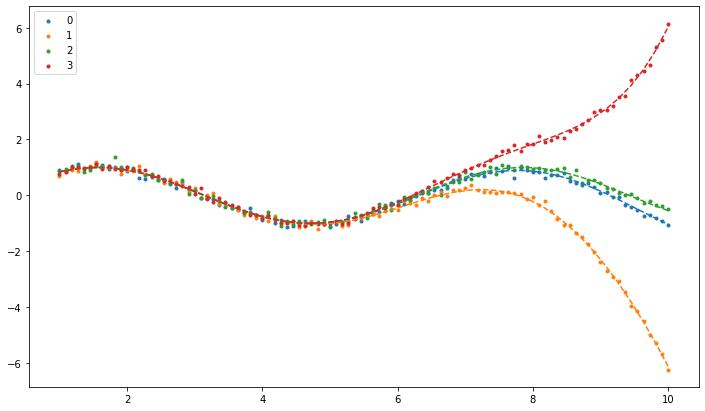

In [8]:
mtlds.plot_data_functions(X, y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_test_numpy = copy(X_test)

In [10]:
X_train, t_train = X_train[:,:-1], X_train[:,-1]
X_test, t_test = X_test[:,:-1], X_test[:,-1]
X_train, t_train, y_train = map(torch.tensor, (X_train, t_train, y_train))
X_train, t_train, y_train = map(lambda obj: obj.float(), [X_train, t_train, y_train])
X_test, t_test, y_test = map(torch.tensor, (X_test, t_test, y_test))
X_test, t_test, y_test = map(lambda obj: obj.float(), [X_test, t_test, y_test])


In [11]:
# train_ds = TensorDataset(X_train, t_train, y_train)
train_ds = TensorDataset(X_train, t_train, y_train)

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)



## ConvexMTL Torch

In [12]:
model = ConvexTorchCombinator(n_features=1, n_output=1, n_channel=1, tasks=range(4), specific_lambda=True)
# model = NeuralNetwork(n_features=1)

In [13]:
trainer = Trainer(max_epochs=max_epochs)

trainer.fit(model, train_dl)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
ic| param_list: ParameterList(
                    (0): Parameter containing: [torch.float32 of size 64x1]
                    (1): Parameter containing: [torch.float32 of size 64]
                    (2): Parameter containing: [torch.float32 of size 64x64]
                    (3): Parameter containing: [torch.float32 of size 64]
                    (4): Parameter containing: [torch.float32 of size 64x64]
                    (5): Parameter containing: [torch.float32 of size 64]
                    (6): Parameter containing: [torch.float32 of size 1x64]
                    (7): Parameter containing: [torch.float32 of size 1]
                )
ic| params: [{'params': ParameterList(
                (0): Parameter containing: [torch.float32 of size 64x1]
                (1): Parameter containing: [torch.float32 of size 64]
                (2): P

Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 30.92it/s, loss=0.0254, v_num=133]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 28.41it/s, loss=0.0254, v_num=133]


In [14]:
# pred = model(X_test, t_test)
pred = model(X_test, t_test)

In [15]:
pred_numpy = pred.detach().numpy()
pred_numpy.shape

(132, 1)

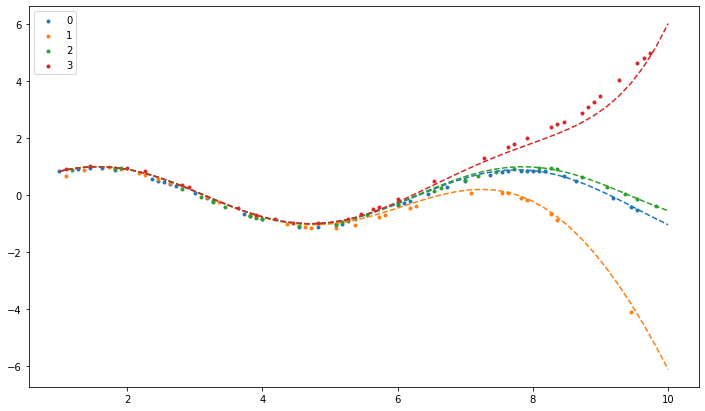

In [16]:
mtlds.plot_data_functions(X_test_numpy, pred_numpy)

In [17]:
model.get_lamb()

ic| self.lamb_dic: {0: Parameter containing:
                   tensor([-0.3257], requires_grad=True),
                    1: Parameter containing:
                   tensor([0.1614], requires_grad=True),
                    2: Parameter containing:
                   tensor([-0.5404], requires_grad=True),
                    3: Parameter containing:
                   tensor([-3.4632], requires_grad=True)}


{0: array([0.41928014], dtype=float32),
 1: array([0.5402613], dtype=float32),
 2: array([0.36810422], dtype=float32),
 3: array([0.03037724], dtype=float32)}

## GraphLaplacian Torch

In [18]:
model = GraphLaplacianTorchCombinator(n_features=1, n_output=1, n_channel=1, tasks=range(4), nu=0.01)
# model = NeuralNetwork(n_features=1)

In [19]:
trainer = Trainer(max_epochs=max_epochs)

trainer.fit(model, train_dl)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
ic| param_list: ParameterList(
                    (0): Parameter containing: [torch.float32 of size 64x1]
                    (1): Parameter containing: [torch.float32 of size 64]
                    (2): Parameter containing: [torch.float32 of size 64x64]
                    (3): Parameter containing: [torch.float32 of size 64]
                    (4): Parameter containing: [torch.float32 of size 64x64]
                    (5): Parameter containing: [torch.float32 of size 64]
                )
ic| param_list: ParameterList(
                    (0): Parameter containing: [torch.float32 of size 64x1]
                    (1): Parameter containing: [torch.float32 of size 64]
                    (2): Parameter containing: [torch.float32 of size 64x64]
                    (3): Parameter containing: [torch.float32 of size 64]
                    

Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 24.71it/s, loss=0.044, v_num=134] 

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 199: 100%|██████████| 9/9 [00:00<00:00, 22.94it/s, loss=0.044, v_num=134]


In [20]:
# pred = model(X_test, t_test)
pred = model(X_test, t_test)

In [21]:
pred_numpy = pred.detach().numpy()
pred_numpy.shape

(132, 1)

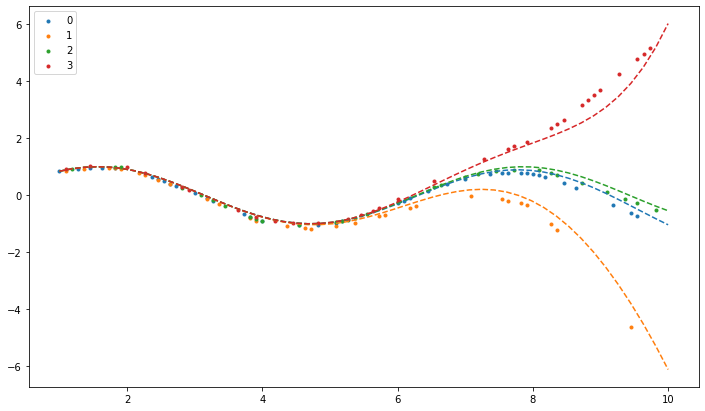

In [22]:
mtlds.plot_data_functions(X_test_numpy, pred_numpy)

In [23]:
model.get_adjMatrix()

ic| adjMatrix_: array([[0.5       , 0.14990203, 0.21722002, 0.12439844],
                       [0.14619739, 0.5       , 0.14668845, 0.10612199],
                       [0.21695858, 0.15018597, 0.5       , 0.11884741],
                       [0.11887424, 0.10367292, 0.11383661, 0.5       ]])


array([[0.5       , 0.14990203, 0.21722002, 0.12439844],
       [0.14619739, 0.5       , 0.14668845, 0.10612199],
       [0.21695858, 0.15018597, 0.5       , 0.11884741],
       [0.11887424, 0.10367292, 0.11383661, 0.5       ]])